# Logistic regression and regularization

## Regularized logistic regression
In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

### init data from datacamp

In [1]:
#uploadToFileIO(X_train, X_valid ,y_train, y_valid)
tobedownloaded="{numpy.ndarray: {'X_train.csv': 'https://file.io/IxGWIc',  'X_valid.csv': 'https://file.io/7RSKsa',  'y_train.csv': 'https://file.io/g9eTya',  'y_valid.csv': 'https://file.io/ZsCu7H'}}"
prefix='data_from_datacamp/ZZZ_Chap3.11_'

In [2]:
from uploadfromdatacamp import saveFromFileIO
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X_train.csv": "https://file.io/IxGWIc",  "X_valid.csv": "https://file.io/7RSKsa",  "y_train.csv": "https://file.io/g9eTya",  "y_valid.csv": "https://file.io/ZsCu7H"}}
{'numpy.ndarray': {'X_train.csv': 'https://file.io/IxGWIc', 'X_valid.csv': 'https://file.io/7RSKsa', 'y_train.csv': 'https://file.io/g9eTya', 'y_valid.csv': 'https://file.io/ZsCu7H'}}


D:\git\datacamp-itp\data-scientist-skills\python-sandbox\linear-classifiers-in-python\uploadfromdatacamp.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


In [3]:
from uploadfromdatacamp import loadNDArrayFromCsv
X_train = loadNDArrayFromCsv(prefix+'X_train.csv')
X_valid = loadNDArrayFromCsv(prefix+'X_valid.csv')
y_train = loadNDArrayFromCsv(prefix+'y_train.csv')
y_valid = loadNDArrayFromCsv(prefix+'y_valid.csv')

In [9]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
C_values=[0.001, 0.01, 0.1, 1, 10, 100, 1000]

### code from datacamp

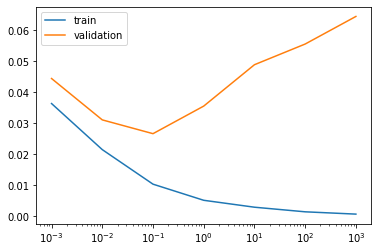

In [14]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value,solver='liblinear', multi_class='auto')
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

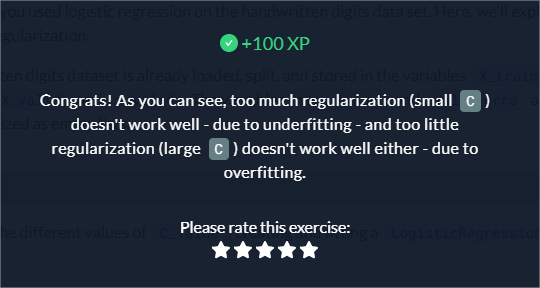

## Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course.

### init data from datacamp

In [15]:
#uploadToFileIO(X_train, y_train)
tobedownloaded="{scipy.sparse.csr.csr_matrix: {'X_train.npz': 'https://file.io/YpcX1f'}, numpy.ndarray: {'y_train.csv': 'https://file.io/C8qmo1'}}"
prefix='data_from_datacamp/ZZZ_Chap3.12_'

In [16]:
from uploadfromdatacamp import saveFromFileIO
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{scipy.sparse.csr.csr_matrix: {"X_train.npz": "https://file.io/YpcX1f"}, numpy.ndarray: {"y_train.csv": "https://file.io/C8qmo1"}}
{'scipy.sparse.csr.csr_matrix': {'X_train.npz': 'https://file.io/YpcX1f'}, 'numpy.ndarray': {'y_train.csv': 'https://file.io/C8qmo1'}}


D:\git\datacamp-itp\data-scientist-skills\python-sandbox\linear-classifiers-in-python\uploadfromdatacamp.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


In [18]:
from uploadfromdatacamp import loadNDArrayFromCsv
from scipy.sparse import load_npz

X_train = load_npz(prefix+'X_train.npz')
y_train = loadNDArrayFromCsv(prefix+'y_train.csv')

In [20]:
from sklearn.model_selection import GridSearchCV

### code from datacamp

In [22]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best CV params {'C': 1}
Total number of features: 2500
Number of selected features: 1220


## Identifying the most positive and negative words
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [ ]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

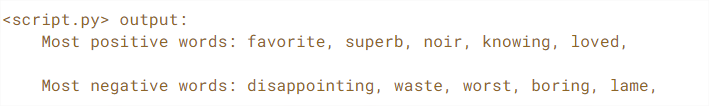

# Logistic regression and probabilities

## Regularization and probabilities
In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.

### init data from datacamp

In [24]:
#uploadToFileIO(X, y)
tobedownloaded="{numpy.ndarray: {'X.csv': 'https://file.io/cXwGup',  'y.csv': 'https://file.io/BIUOvb'}}"
prefix='data_from_datacamp/ZZZ_Chap3.21_'

In [25]:
from uploadfromdatacamp import saveFromFileIO
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X.csv": "https://file.io/cXwGup",  "y.csv": "https://file.io/BIUOvb"}}
{'numpy.ndarray': {'X.csv': 'https://file.io/cXwGup', 'y.csv': 'https://file.io/BIUOvb'}}


D:\git\datacamp-itp\data-scientist-skills\python-sandbox\linear-classifiers-in-python\uploadfromdatacamp.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


In [26]:
from uploadfromdatacamp import loadNDArrayFromCsv
X = loadNDArrayFromCsv(prefix+'X.csv')
y = loadNDArrayFromCsv(prefix+'y.csv')

In [29]:
from sklearn.linear_model import LogisticRegression
#import inspect
#print(inspect.getsource(plot_4_classifiers))
import matplotlib.pyplot as plt
def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()
    
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

### code from datacamp

C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


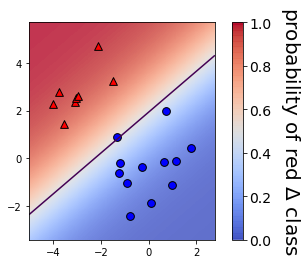

Maximum predicted probability 0.9761229988101328


In [31]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


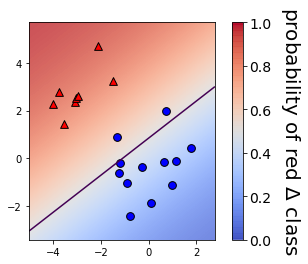

Maximum predicted probability 0.8990965709494242


In [32]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

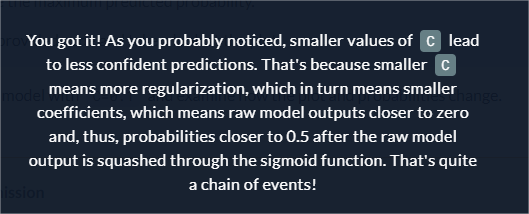

## Visualizing easy and difficult examples
In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

### init data from datacamp

In [33]:
#uploadToFileIO(X, y)
tobedownloaded="{numpy.ndarray: {'X.csv': 'https://file.io/DiddOC',  'y.csv': 'https://file.io/roZBaL'}}"
prefix='data_from_datacamp/ZZZ_Chap3.22_'

In [34]:
from uploadfromdatacamp import saveFromFileIO
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X.csv": "https://file.io/DiddOC",  "y.csv": "https://file.io/roZBaL"}}
{'numpy.ndarray': {'X.csv': 'https://file.io/DiddOC', 'y.csv': 'https://file.io/roZBaL'}}


D:\git\datacamp-itp\data-scientist-skills\python-sandbox\linear-classifiers-in-python\uploadfromdatacamp.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


In [35]:
from uploadfromdatacamp import loadNDArrayFromCsv
X = loadNDArrayFromCsv(prefix+'X.csv')
y = loadNDArrayFromCsv(prefix+'y.csv')

In [60]:
#import inspect
#print(inspect.getsource(show_digit))
import matplotlib.pyplot as plt

def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = int(lr.predict(X[i][None])[0])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()


### code from datacamp

C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


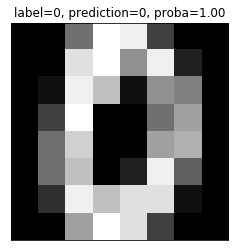

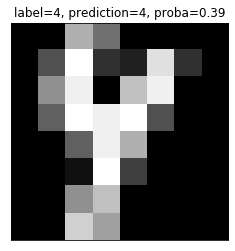

In [62]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

# Multi-class logistic regression

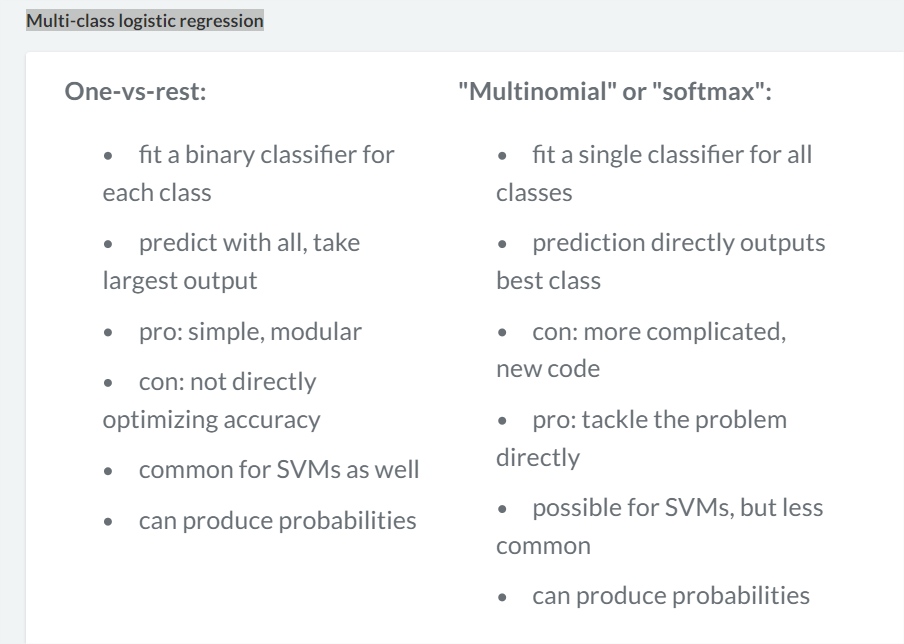

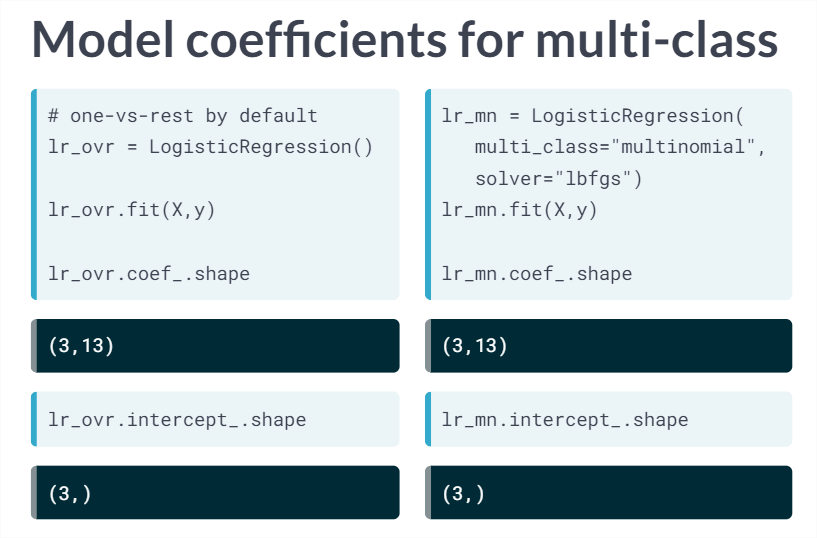

## Fitting multi-class logistic regression
In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into X_train, y_train, X_test, and y_test.

### init data from datacamp

In [63]:
#uploadToFileIO(X_train, X_test ,y_train, y_test)
tobedownloaded="{numpy.ndarray: {'X_test.csv': 'https://file.io/BeNyJS',  'X_train.csv': 'https://file.io/KuMZoC',  'y_test.csv': 'https://file.io/Qh24Ia',  'y_train.csv': 'https://file.io/gUET7E'}}"
prefix='data_from_datacamp/ZZZ_Chap3.31_'

In [64]:
from uploadfromdatacamp import saveFromFileIO
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X_test.csv": "https://file.io/BeNyJS",  "X_train.csv": "https://file.io/KuMZoC",  "y_test.csv": "https://file.io/Qh24Ia",  "y_train.csv": "https://file.io/gUET7E"}}
{'numpy.ndarray': {'X_test.csv': 'https://file.io/BeNyJS', 'X_train.csv': 'https://file.io/KuMZoC', 'y_test.csv': 'https://file.io/Qh24Ia', 'y_train.csv': 'https://file.io/gUET7E'}}


D:\git\datacamp-itp\data-scientist-skills\python-sandbox\linear-classifiers-in-python\uploadfromdatacamp.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


In [65]:
from uploadfromdatacamp import loadNDArrayFromCsv
X_train = loadNDArrayFromCsv(prefix+'X_train.csv')
X_test = loadNDArrayFromCsv(prefix+'X_test.csv')
y_train = loadNDArrayFromCsv(prefix+'y_train.csv')
y_test = loadNDArrayFromCsv(prefix+'y_test.csv')

In [66]:
from sklearn.linear_model import LogisticRegression

### code from datacamp

In [69]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


OVR training accuracy: 0.9948032665181886
OVR test accuracy    : 0.9644444444444444
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9688888888888889


C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Visualizing multi-class logistic regression
In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme.

The data set is loaded into X_train and y_train. The two logistic regression objects,lr_mn and lr_ovr, are already instantiated (with C=100), fit, and plotted.

Notice that lr_ovr never predicts the dark blue class... yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.

### init data from datacamp

In [70]:
#uploadToFileIO(X_train, y_train)
tobedownloaded="{numpy.ndarray: {'X_train.csv': 'https://file.io/mWXSnp',  'y_train.csv': 'https://file.io/3j7MDm'}}"
prefix='data_from_datacamp/ZZZ_Chap3.32_'

In [71]:
from uploadfromdatacamp import saveFromFileIO
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X_train.csv": "https://file.io/mWXSnp",  "y_train.csv": "https://file.io/3j7MDm"}}
{'numpy.ndarray': {'X_train.csv': 'https://file.io/mWXSnp', 'y_train.csv': 'https://file.io/3j7MDm'}}


D:\git\datacamp-itp\data-scientist-skills\python-sandbox\linear-classifiers-in-python\uploadfromdatacamp.py:97: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


In [72]:
from uploadfromdatacamp import loadNDArrayFromCsv
X_train = loadNDArrayFromCsv(prefix+'X_train.csv')
y_train = loadNDArrayFromCsv(prefix+'y_train.csv')

In [73]:
from sklearn.linear_model import LogisticRegression

lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
import matplotlib.pyplot as plt
def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()
    
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

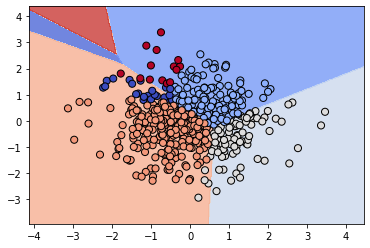

In [75]:
plot_classifier(X_train,y_train,lr_ovr)

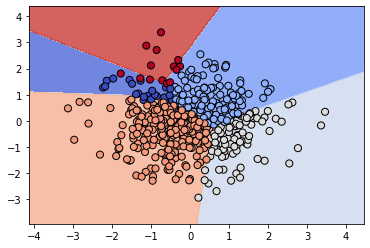

In [76]:
plot_classifier(X_train,y_train,lr_mn)

### code from datacamp

Softmax     training accuracy: 0.952
One-vs-rest training accuracy: 0.902


C:\Bib\envs\datacamp-py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


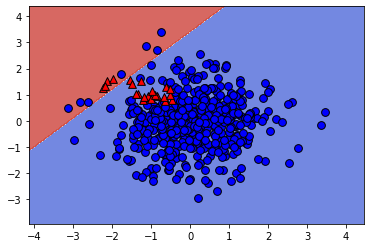

In [78]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

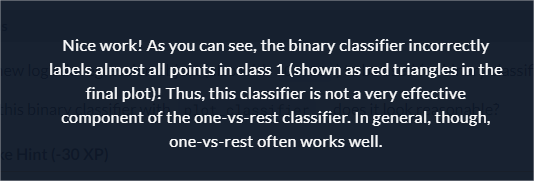